In [1]:
import pandas as pd
df_1103=pd.read_csv("pm25_merged_dataset/df_1103.csv")
df_1201=pd.read_csv("pm25_merged_dataset/df_1201.csv")

In [2]:
df_1201.columns

Index(['Unnamed: 0', 'datetime', 'AQS_Code', 'NO2_Measurement',
       'CO_Measurement', 'SO2_Measurement', 'RH_Measurement',
       'Temp_Measurement', 'ozone_Measurement', 'PM_Measurement'],
      dtype='object')

In [3]:
df_1103.columns

Index(['Unnamed: 0', 'datetime', 'AQS_Code', 'NO2_Measurement',
       'CO_Measurement', 'SO2_Measurement', 'RH_Measurement',
       'Temp_Measurement', 'ozone_Measurement', 'PM_Measurement'],
      dtype='object')

In [4]:
import matplotlib.pyplot as plt

def plots(df, column):
    df.index = pd.to_datetime(df.index)
    # Plot for 24 hours
    plt.figure(figsize=(10, 6))
    df_24h = df.resample('H').mean().iloc[:24]
    plt.plot(df_24h.index, df_24h[column], color='blue', marker='o', linestyle='-')
    plt.title('24-Hour Average PM2.5')
    plt.xlabel('Timestamp')
    plt.ylabel('PM2.5')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    df_monthly = df.resample('M').mean()  # Resample to monthly data
    plt.plot(df_monthly.index, df_monthly[column], color='green', marker='o', linestyle='-')
    plt.title('Monthly Average PM2.5')
    plt.xlabel('Date')
    plt.ylabel('PM2.5')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()   


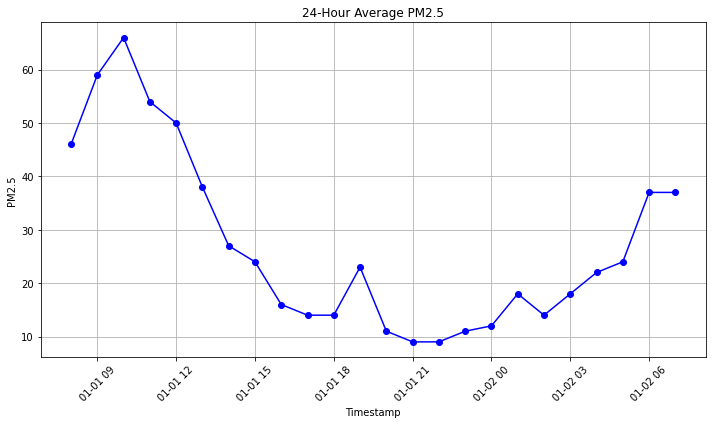

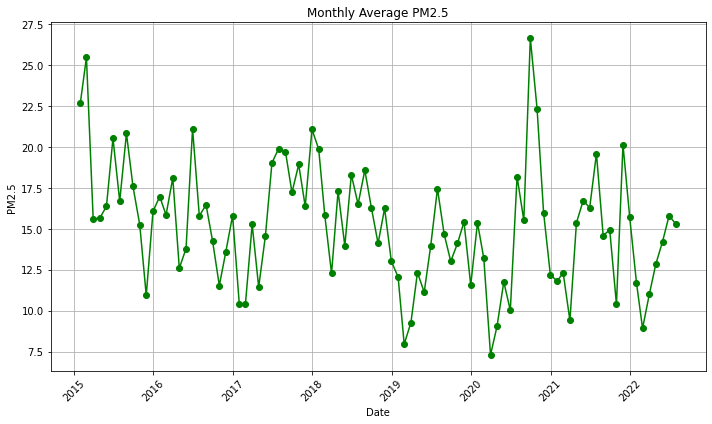

In [6]:
column = 'PM_Measurement'
df_1103.index= df_1103['datetime']
plots(df_1103, column)


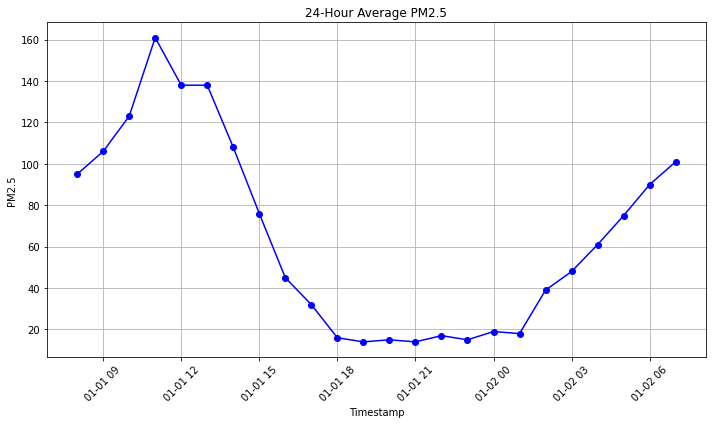

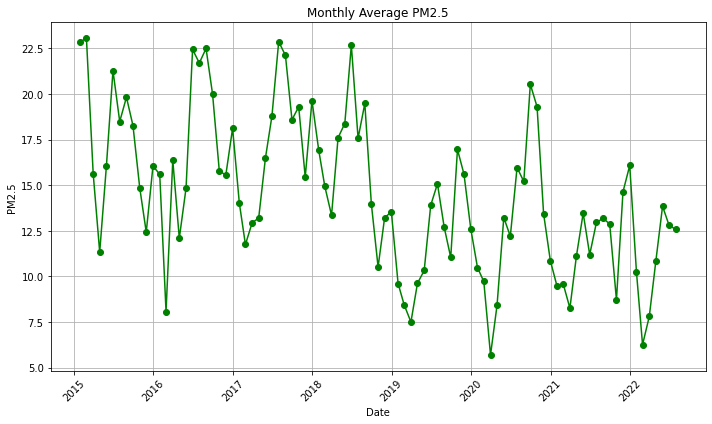

In [7]:
column = 'PM_Measurement'
df_1201.index= df_1201['datetime']
plots(df_1201, column)


In [8]:
df_1103['PM_Measurement'].describe()

count    65712.000000
mean        15.203386
std         10.879135
min         -6.000000
25%          9.000000
50%         13.000000
75%         19.000000
max        541.000000
Name: PM_Measurement, dtype: float64

In [9]:
df_1103['PM_Measurement'].isnull().sum()

0

In [10]:
df_1103.loc[df_1103['PM_Measurement'] < 0, 'PM_Measurement'] = 0

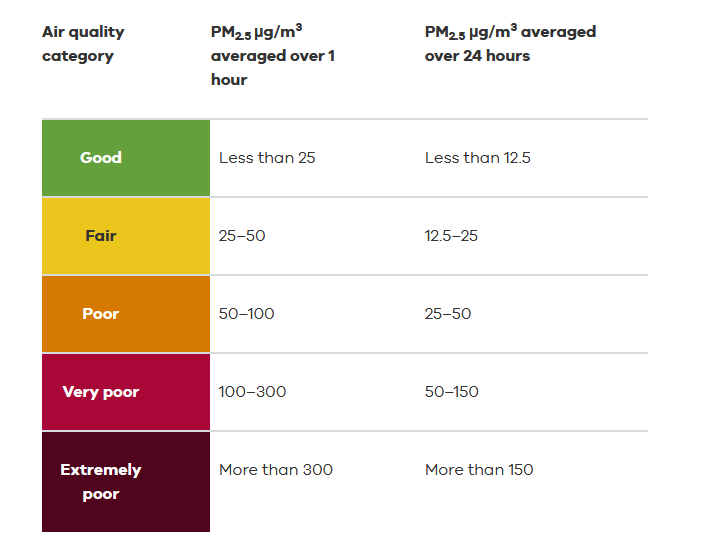

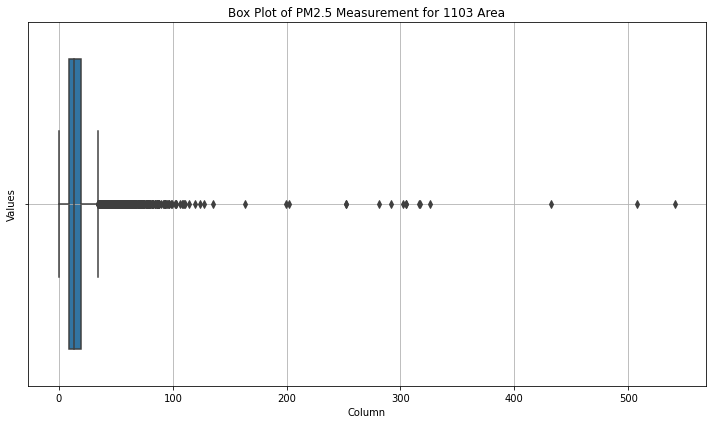

In [11]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_1103['PM_Measurement'])
plt.title('Box Plot of PM2.5 Measurement for 1103 Area')
plt.xlabel('Column')
plt.ylabel('Values')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
df_1201['PM_Measurement'].describe()

count    65712.000000
mean        14.602232
std         10.656137
min         -3.700000
25%          8.400000
50%         12.900000
75%         19.000000
max        995.600000
Name: PM_Measurement, dtype: float64

In [13]:
df_1201['PM_Measurement'].isnull().sum()

0

In [77]:
df_1201.loc[df_1201['PM_Measurement'] < 0, 'PM_Measurement'] = 0
df_1201['PM_Measurement'].describe()

count    65712.000000
mean        14.610299
std         10.644348
min          0.000000
25%          8.400000
50%         12.900000
75%         19.000000
max        995.600000
Name: PM_Measurement, dtype: float64

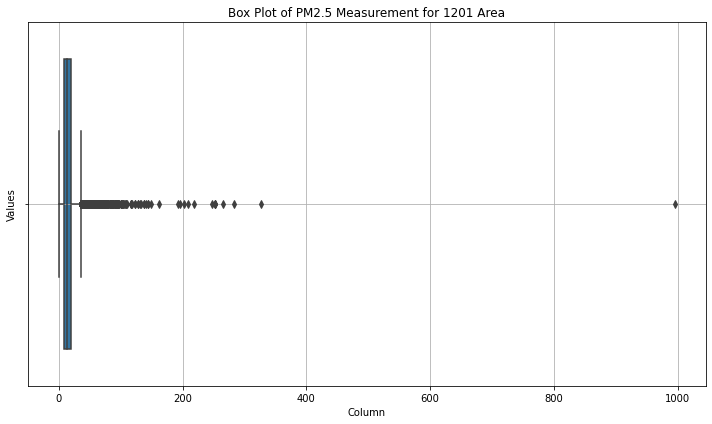

In [80]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_1201['PM_Measurement'])
plt.title('Box Plot of PM2.5 Measurement for 1201 Area')
plt.xlabel('Column')
plt.ylabel('Values')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
df_1103[df_1103['PM_Measurement']>300]

# Not really an outlier
#https://www.fire.ca.gov/incidents/2020/7/5/soledad-fire

,Unnamed: 0,datetime,AQS_Code,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement
datetime,,,,,,,,,,
2017-07-05 07:00:00,43966,2017-07-05 07:00:00,1103,22.60,0.4875,0.0,28.0,68.2,0.005,326.0
2020-07-05 05:00:00,96570,2020-07-05 05:00:00,1103,20.75,0.2000,0.0,29.0,70.0,0.008,508.0
2020-07-05 06:00:00,96572,2020-07-05 06:00:00,1103,18.80,0.1000,0.0,33.0,69.1,0.007,432.0
2020-07-05 10:00:00,96580,2020-07-05 10:00:00,1103,18.45,0.2000,0.0,69.0,65.8,0.000,541.0
2020-07-05 11:00:00,96582,2020-07-05 11:00:00,1103,18.40,0.3000,0.0,60.0,65.2,0.001,305.0
2020-07-05 13:00:00,96586,2020-07-05 13:00:00,1103,16.40,0.2000,0.0,40.0,64.1,0.002,317.0
2020-07-05 14:00:00,96588,2020-07-05 14:00:00,1103,17.50,0.1000,0.0,36.0,67.7,0.008,305.0
2020-07-05 15:00:00,96590,2020-07-05 15:00:00,1103,20.15,0.0000,0.0,32.0,72.5,0.017,316.0
2021-07-05 05:00:00,114090,2021-07-05 05:00:00,1103,24.80,0.2000,1.8,42.0,67.0,0.009,302.0


In [15]:
df_1201[df_1201['PM_Measurement']>300]

# Not really an outlier
# https://www.fire.ca.gov/incidents/2019/10/10/saddle-ridge-fire

,Unnamed: 0,datetime,AQS_Code,NO2_Measurement,CO_Measurement,SO2_Measurement,RH_Measurement,Temp_Measurement,ozone_Measurement,PM_Measurement
datetime,,,,,,,,,,
2017-07-05 07:00:00,43967,2017-07-05 07:00:00,1201,22.6,0.4725,3.1,30.0,68.2,0.022,326.0
2019-10-11 16:00:00,83729,2019-10-11 16:00:00,1201,25.4,0.6000,0.8,NaN,75.1,0.075,995.6
